<meshio mesh object>
  Number of points: 88
  Number of cells:
    line: 43
    triangle: 131
    vertex: 3


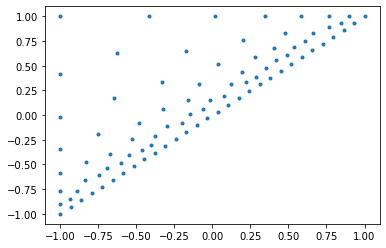

In [14]:
import pygmsh
import matplotlib.pyplot as plt
import numpy as np

with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [-1,-1],
            [1,1],
            [-1, 1],
        ],
        mesh_size = 0.1
    )

    # set mesh size with function
    geom.set_mesh_size_callback(
        lambda dim, tag, x, y, z: (0.2*(np.abs(x - y)) + 0.05)*2.0
    )

    mesh = geom.generate_mesh()
print(mesh)
pts = mesh.points

plt.plot(pts[:,0],pts[:,1],'.')

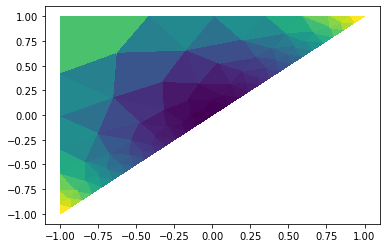

In [15]:
#try matplotlib triangulation
from matplotlib.tri import Triangulation

def f(p):
    return p[:,0]**2 + p[:,1]**2

t = Triangulation(pts[:,0], pts[:,1])
v = f(pts)

fig,ax = plt.subplots()
ax.tripcolor(pts[:,0], pts[:,1], v)


